In [1]:
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np

from sklearn.linear_model import LinearRegression


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [12]:
target_column = 'SalePrice'

#
numerical_df = train_df.select_dtypes(include='number')
#numerical_df = numerical_df.drop(columns=['Id', target_column])
numerical_df = numerical_df.dropna(axis=1)
numerical_df=numerical_df[[column for column in numerical_df.columns if column in test_df.dropna(axis=1).columns]]

y=train_df[target_column]

numerical_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,856,854,0,...,0,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,1262,0,0,...,1,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,920,866,0,...,1,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,961,756,0,...,1,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,1145,1053,0,...,1,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,953,694,0,...,1,0,40,0,0,0,0,0,8,2007
1456,1457,20,13175,6,6,1978,1988,2073,0,0,...,2,349,0,0,0,0,0,0,2,2010
1457,1458,70,9042,7,9,1941,2006,1188,1152,0,...,2,0,60,0,0,0,0,2500,5,2010
1458,1459,20,9717,5,6,1950,1996,1078,0,0,...,0,366,0,112,0,0,0,0,4,2010


In [16]:
y_log = np.log(y)

<AxesSubplot: >

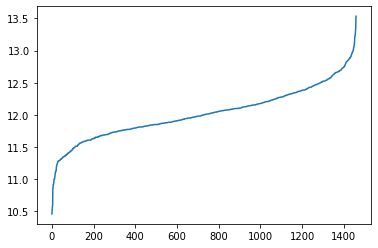

In [35]:
y_log.sort_values().reset_index()["SalePrice"].plot()

In [36]:
# split training validation dataset
# Don't forget to remove Id and target column while fitting the model!
y_median = np.median(y_log) + 1.5*st.iqr(y_log)
y_median

12.749456399180438

In [39]:
y_max = y_log.quantile(q=0.75) + 1.5*st.iqr(y_log)
y_max

13.021682213395529

In [37]:
y_log.quantile(q=0.75)

12.273731294003989

In [19]:
y_min = np.percentile(y_log,q=0.25) - 1.5*st.iqr(y_log)
y_min

9.842460449032883

In [58]:
logic = (y_log>=y_min) & (y_log<=y_max) # only 13 outliers

In [60]:
y[logic]

1447

In [56]:
numerical_df_no_outliers = numerical_df[(y_log>=y_min) & (y_log<=y_max)]

In [63]:
numerical_df_no_outliers = numerical_df_no_outliers.drop(columns=["Id"])

In [64]:
numerical_df_no_outliers

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,856,854,0,1710,...,0,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,1,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,920,866,0,1786,...,1,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,961,756,0,1717,...,1,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,1,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,953,694,0,1647,...,1,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,2073,0,0,2073,...,2,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,1188,1152,0,2340,...,2,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,1078,0,0,1078,...,0,366,0,112,0,0,0,0,4,2010


In [65]:
model = LinearRegression()

In [67]:
model.fit(X=numerical_df_no_outliers,y=y[logic])

LinearRegression()

In [69]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
model.predict()

In [ ]:
# compare validation MSLE by using the log target for MLR


In [ ]:
# compare validation MSLE by standardizing input feature in MLR

In [ ]:
# compare validation MSLE by removing outliers from training dateset in MLR

In [ ]:
# compare validation MSLE by removing highly correlated (positively or negatively) input feature in MLR

In [ ]:
# train all models seen in class MLR, Lasso, Ridge, Elastic Net, +Lars,

In [ ]:
# Submit the best model in Kaggle, what is your name+public score?